<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/DataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=66465a1e48c20464c22c2f2f89e64d2e748ad500bd5661991a09e856f4e34082
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import col, regexp_replace, when
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

In [5]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()


In [6]:
# Define column names and data types
schema = StructType([
    StructField("HCHO reading", DoubleType(), True),
    StructField("Location", StringType(), True),
    StructField("Current Date", StringType(), True),
    StructField("Next Date", StringType(), True)
])

# Load the data for 'Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper' with specified column names
col_mat_nuw_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/col_mat_nuw_output.csv", header=False, schema=schema)

# Load the data for 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper' with specified column names
mon_kur_jaf_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/mon_kur_jaf_output.csv", header=False, schema=schema)

# Load the data for 'Kandy Proper' with specified column names
kan_df = spark.read.csv("/content/drive/MyDrive/data engineering CW/kan_output.csv", header=False, schema=schema)


In [7]:
col_mat_nuw_df.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [9]:
# Filter data for 'Colombo Proper' and create a new DataFrame
colombo_df = col_mat_nuw_df.filter(col("Location") == "Colombo Proper")

# Filter data for 'Deniyaya, Matara' and create a new DataFrame
deniyaya_matara_df = col_mat_nuw_df.filter(col("Location") == "Deniyaya, Matara")

# Filter data for 'Nuwara Eliya Proper' and create a new DataFrame
nuwara_eliya_df = col_mat_nuw_df.filter(col("Location") == "Nuwara Eliya Proper")

# Filter data for 'Bibile, Monaragala' and create a new DataFrame
bibile_monaragala_df = mon_kur_jaf_df.filter(col("Location") == "Bibile, Monaragala")

# Filter data for 'Kurunegala Proper' and create a new DataFrame
kurunegala_df = mon_kur_jaf_df.filter(col("Location") == "Kurunegala Proper")

# Filter data for 'Jaffna Proper' and create a new DataFrame
jaffna_df = mon_kur_jaf_df.filter(col("Location") == "Jaffna Proper")

# Filter data for 'Kandy Proper' and create a new DataFrame
kandy_df = kan_df.filter(col("Location") == "Kandy Proper")

# Show sample data for verification
colombo_df.show(5)
deniyaya_matara_df.show(5)
nuwara_eliya_df.show(5)
bibile_monaragala_df.show(5)
kurunegala_df.show(5)
jaffna_df.show(5)
kandy_df.show(5)

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
+--------------------+--------------+------------+----------+
only showing top 5 rows

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, M

In [10]:
colombo_df.select("HCHO reading").describe().show()

deniyaya_matara_df.select("HCHO reading").describe().show()

# Summary statistics for 'Nuwara Eliya Proper'
nuwara_eliya_df.select("HCHO reading").describe().show()

# Summary statistics for 'Bibile, Monaragala'
bibile_monaragala_df.select("HCHO reading").describe().show()

# Summary statistics for 'Kurunegala Proper'
kurunegala_df.select("HCHO reading").describe().show()

# Summary statistics for 'Jaffna Proper'
jaffna_df.select("HCHO reading").describe().show()

# Summary statistics for 'Kandy Proper'
kandy_df.select("HCHO reading").describe().show()

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                1339|
|   mean|1.585714042136032...|
| stddev|9.928801616320847E-5|
|    min|-2.29102592175331...|
|    max|6.500630612512026E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                 979|
|   mean|9.165608034246397E-5|
| stddev|9.717767267758977E-5|
|    min|-2.59296176552668...|
|    max|8.997101837438971E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                 741|
|   mean|8.792586073767327E-5|
| stddev|8.366257795578253E-5|
|    min|-1.78604299088136...|
|    max|4.191362201414739E-4|
+-------+--------------------+

+-------+--------------------+
|summary|        HCHO reading|
+-------+--------------------+
|  count|                1131|
|   mean|1.264313797412045...|
| std

In [11]:
from pyspark.sql.functions import sum

# Count null values for 'Colombo Proper'
colombo_null_count = colombo_df.select([col(c).isNull().cast("int").alias(c) for c in colombo_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Deniyaya, Matara'
deniyaya_matara_null_count = deniyaya_matara_df.select([col(c).isNull().cast("int").alias(c) for c in deniyaya_matara_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Nuwara Eliya Proper'
nuwara_eliya_null_count = nuwara_eliya_df.select([col(c).isNull().cast("int").alias(c) for c in nuwara_eliya_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Bibile, Monaragala'
bibile_monaragala_null_count = bibile_monaragala_df.select([col(c).isNull().cast("int").alias(c) for c in bibile_monaragala_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kurunegala Proper'
kurunegala_null_count = kurunegala_df.select([col(c).isNull().cast("int").alias(c) for c in kurunegala_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Jaffna Proper'
jaffna_null_count = jaffna_df.select([col(c).isNull().cast("int").alias(c) for c in jaffna_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kandy Proper'
kandy_null_count = kandy_df.select([col(c).isNull().cast("int").alias(c) for c in kandy_df.columns]).agg(sum(col("HCHO reading")).alias("Null Count")).collect()[0]["Null Count"]

# Print null counts for each city
print("Null Counts for Colombo Proper:", colombo_null_count)
print("Null Counts for Deniyaya, Matara:", deniyaya_matara_null_count)
print("Null Counts for Nuwara Eliya Proper:", nuwara_eliya_null_count)
print("Null Counts for Bibile, Monaragala:", bibile_monaragala_null_count)
print("Null Counts for Kurunegala Proper:", kurunegala_null_count)
print("Null Counts for Jaffna Proper:", jaffna_null_count)
print("Null Counts for Kandy Proper:", kandy_null_count)

Null Counts for Colombo Proper: 487
Null Counts for Deniyaya, Matara: 847
Null Counts for Nuwara Eliya Proper: 1085
Null Counts for Bibile, Monaragala: 695
Null Counts for Kurunegala Proper: 592
Null Counts for Jaffna Proper: 365
Null Counts for Kandy Proper: 793


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import mean, lag, lead, col, when

# Define window specification
windowSpec = Window.orderBy("Current Date")

# Calculate lag and lead values
lag_value = lag("HCHO reading").over(windowSpec)
lead_value = lead("HCHO reading").over(windowSpec)

# Replace missing values with the mean of neighboring values
deniyaya_matara_df = deniyaya_matara_df.withColumn("HCHO reading",
                                    when(col("HCHO reading").isNull(),
                                         (lag_value + lead_value) / 2).otherwise(col("HCHO reading")))

# Show the resulting DataFrame with replaced values
deniyaya_matara_df.show()

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

def impute_missing_values_linear_regression(df):
    # Drop rows with missing values as Linear Regression cannot handle them directly
    df = df.dropna(subset=["HCHO reading"])

    # Convert string columns to numerical using StringIndexer
    location_indexer = StringIndexer(inputCol="Location", outputCol="LocationIndex")
    date_indexer = StringIndexer(inputCol="Current Date", outputCol="DateIndex")
    next_date_indexer = StringIndexer(inputCol="Next Date", outputCol="NextDateIndex")

    # Fit StringIndexer models
    location_indexer_model = location_indexer.fit(df)
    date_indexer_model = date_indexer.fit(df)
    next_date_indexer_model = next_date_indexer.fit(df)

    # Apply StringIndexer models to DataFrame
    df = location_indexer_model.transform(df)
    df = date_indexer_model.transform(df)
    df = next_date_indexer_model.transform(df)

    # Assemble features
    assembler = VectorAssembler(inputCols=["LocationIndex", "DateIndex", "NextDateIndex"], outputCol="features")
    df_assembled = assembler.transform(df)

    # Train a linear regression model
    lr = LinearRegression(featuresCol="features", labelCol="HCHO reading")
    lr_model = lr.fit(df_assembled)

    # Apply the model to predict missing values
    predictions = lr_model.transform(df_assembled)

    # Replace missing values with predicted values
    return predictions.withColumn("HCHO reading",
                                   when(col("HCHO reading").isNull(),
                                        col("prediction")).otherwise(col("HCHO reading")))

# Apply the function to the DataFrame
colombo_df = impute_missing_values_linear_regression(colombo_df)
deniyaya_matara_df = impute_missing_values_linear_regression(deniyaya_matara_df)
nuwara_eliya_df = impute_missing_values_linear_regression(nuwara_eliya_df)
bibile_monaragala_df = impute_missing_values_linear_regression(bibile_monaragala_df)
kurunegala_df = impute_missing_values_linear_regression(kurunegala_df)
jaffna_df = impute_missing_values_linear_regression(jaffna_df)
kandy_df = impute_missing_values_linear_regression(kandy_df)

In [12]:
from pyspark.sql import Window
from pyspark.sql.functions import col, avg, when

def fill_missing_values_with_rolling_mean(df, column_name, window_size=3):
    """
    Fills missing values in a PySpark DataFrame column using the rolling mean.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.
        window_size (int, optional): The window size for calculating the rolling mean.
            Defaults to 3 (considering 3 values before the missing value).

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the rolling mean.
    """

    # Create a window specification
    window = Window.orderBy(df["Current Date"]).rowsBetween(-window_size + 1, 0)

    # Fill missing values with the rolling mean of the previous 'window_size' values
    df = df.withColumn(
        column_name,
        when(col(column_name).isNull(),
             avg(when(col(column_name).isNotNull(), col(column_name))).over(window))
             .otherwise(col(column_name))
    )

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_with_rolling_mean(colombo_df, "HCHO reading")
deniyaya_matara_df = fill_missing_values_with_rolling_mean(deniyaya_matara_df, "HCHO reading")
nuwara_eliya_df = fill_missing_values_with_rolling_mean(nuwara_eliya_df, "HCHO reading")
bibile_monaragala_df = fill_missing_values_with_rolling_mean(bibile_monaragala_df, "HCHO reading")
kurunegala_df = fill_missing_values_with_rolling_mean(kurunegala_df, "HCHO reading")
jaffna_df = fill_missing_values_with_rolling_mean(jaffna_df, "HCHO reading")
kandy_df = fill_missing_values_with_rolling_mean(kandy_df, "HCHO reading")

# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|1.904303130490019...|Colombo Proper|  2019-

In [13]:
from pyspark.sql import Window
from pyspark.sql.functions import col, last



def fill_missing_values_forward(df, column_name):
    """
    Fills missing values in a PySpark DataFrame column with the previous non-null value.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the previous non-null value.
    """

    # Create a window specification for forward fill
    ffill = Window.partitionBy('Location').orderBy('Current Date').rowsBetween(Window.unboundedPreceding, Window.currentRow)

    # Fill missing values with the previous non-null value
    df = df.withColumn(column_name + '_filled', last(column_name, ignorenulls=True).over(ffill))

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_forward(colombo_df, 'HCHO reading')
deniyaya_matara_df = fill_missing_values_forward(deniyaya_matara_df, 'HCHO reading')
nuwara_eliya_df = fill_missing_values_forward(nuwara_eliya_df, 'HCHO reading')
bibile_monaragala_df = fill_missing_values_forward(bibile_monaragala_df, 'HCHO reading')
kurunegala_df = fill_missing_values_forward(kurunegala_df, 'HCHO reading')
jaffna_df = fill_missing_values_forward(jaffna_df, 'HCHO reading')
kandy_df = fill_missing_values_forward(kandy_df, 'HCHO reading')

# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+--------------------+
|        HCHO reading|      Location|Current Date| Next Date| HCHO reading_filled|
+--------------------+--------------+------------+----------+--------------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|

In [14]:
from pyspark.sql.functions import coalesce, lead
from pyspark.sql import Window

def fill_missing_values_backward(df, column_name):
    """
    Fills missing values in a PySpark DataFrame column with the next non-null value (backward fill).

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with missing values.
        column_name (str): The name of the column with missing values.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with missing values replaced by the next non-null value.
    """

    # Create a window specification for backward fill
    bfill = Window.partitionBy('Location').orderBy('Current Date')

    # Fill missing values with the next non-null value
    df = df.withColumn(column_name + '_filled_backwards',
                       coalesce(df[column_name], lead(df[column_name], 1).over(bfill)))

    return df

# Apply the function to each DataFrame
colombo_df = fill_missing_values_backward(colombo_df, 'HCHO reading_filled')
deniyaya_matara_df = fill_missing_values_backward(deniyaya_matara_df, 'HCHO reading_filled')
nuwara_eliya_df = fill_missing_values_backward(nuwara_eliya_df, 'HCHO reading_filled')
bibile_monaragala_df = fill_missing_values_backward(bibile_monaragala_df, 'HCHO reading_filled')
kurunegala_df = fill_missing_values_backward(kurunegala_df, 'HCHO reading_filled')
jaffna_df = fill_missing_values_backward(jaffna_df, 'HCHO reading_filled')
kandy_df = fill_missing_values_backward(kandy_df, 'HCHO reading_filled')
nuwara_eliya_df = fill_missing_values_backward(nuwara_eliya_df, 'HCHO reading_filled_filled_backwards')

In [15]:
# Show the filled DataFrames
print("Colombo Filled DataFrame:")
colombo_df.show()

print("Deniyaya Matara Filled DataFrame:")
deniyaya_matara_df.show()

print("Nuwara Eliya Filled DataFrame:")
nuwara_eliya_df.show()

print("Bibile Monaragala Filled DataFrame:")
bibile_monaragala_df.show()

print("Kurunegala Filled DataFrame:")
kurunegala_df.show()

print("Jaffna Filled DataFrame:")
jaffna_df.show()

print("Kandy Filled DataFrame:")
kandy_df.show()


Colombo Filled DataFrame:
+--------------------+--------------+------------+----------+--------------------+------------------------------------+
|        HCHO reading|      Location|Current Date| Next Date| HCHO reading_filled|HCHO reading_filled_filled_backwards|
+--------------------+--------------+------------+----------+--------------------+------------------------------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|                1.969834395781014...|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|                2.625522171968594...|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|                9.852118897938794E-5|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|                2.099320518114242E-4|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|                1.785337298892930...|
|1.08229670023

In [ ]:
from pyspark.sql.functions import sum

# Count null values for 'Colombo Proper'
colombo_null_count = colombo_df.select([col(c).isNull().cast("int").alias(c) for c in colombo_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Deniyaya, Matara'
deniyaya_matara_null_count = deniyaya_matara_df.select([col(c).isNull().cast("int").alias(c) for c in deniyaya_matara_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Nuwara Eliya Proper'
nuwara_eliya_null_count = nuwara_eliya_df.select([col(c).isNull().cast("int").alias(c) for c in nuwara_eliya_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Bibile, Monaragala'
bibile_monaragala_null_count = bibile_monaragala_df.select([col(c).isNull().cast("int").alias(c) for c in bibile_monaragala_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kurunegala Proper'
kurunegala_null_count = kurunegala_df.select([col(c).isNull().cast("int").alias(c) for c in kurunegala_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Jaffna Proper'
jaffna_null_count = jaffna_df.select([col(c).isNull().cast("int").alias(c) for c in jaffna_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Count null values for 'Kandy Proper'
kandy_null_count = kandy_df.select([col(c).isNull().cast("int").alias(c) for c in kandy_df.columns]).agg(sum(col("HCHO reading_filled_filled_backwards")).alias("Null Count")).collect()[0]["Null Count"]

# Print null counts for each city
print("Null Counts for Colombo Proper:", colombo_null_count)
print("Null Counts for Deniyaya, Matara:", deniyaya_matara_null_count)
print("Null Counts for Nuwara Eliya Proper:", nuwara_eliya_null_count)
print("Null Counts for Bibile, Monaragala:", bibile_monaragala_null_count)
print("Null Counts for Kurunegala Proper:", kurunegala_null_count)
print("Null Counts for Jaffna Proper:", jaffna_null_count)
print("Null Counts for Kandy Proper:", kandy_null_count)

In [16]:
def drop_and_rename_columns(df):
    """
    Drops the existing 'HCHO reading' column and renames the backward filled column.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the columns.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with columns dropped and renamed.
    """
    # Drop the existing 'HCHO reading' column
    df = df.drop('HCHO reading')

    # Drop the existing 'HCHO reading' column
    df = df.drop('HCHO reading_filled')

    # Rename the backward filled column to 'HCHO reading'
    df = df.withColumnRenamed('HCHO reading_filled_filled_backwards', 'HCHO reading')

    return df

# Apply the function to each DataFrame
colombo_df = drop_and_rename_columns(colombo_df)
deniyaya_matara_df = drop_and_rename_columns(deniyaya_matara_df)
bibile_monaragala_df = drop_and_rename_columns(bibile_monaragala_df)
kurunegala_df = drop_and_rename_columns(kurunegala_df)
jaffna_df = drop_and_rename_columns(jaffna_df)
kandy_df = drop_and_rename_columns(kandy_df)

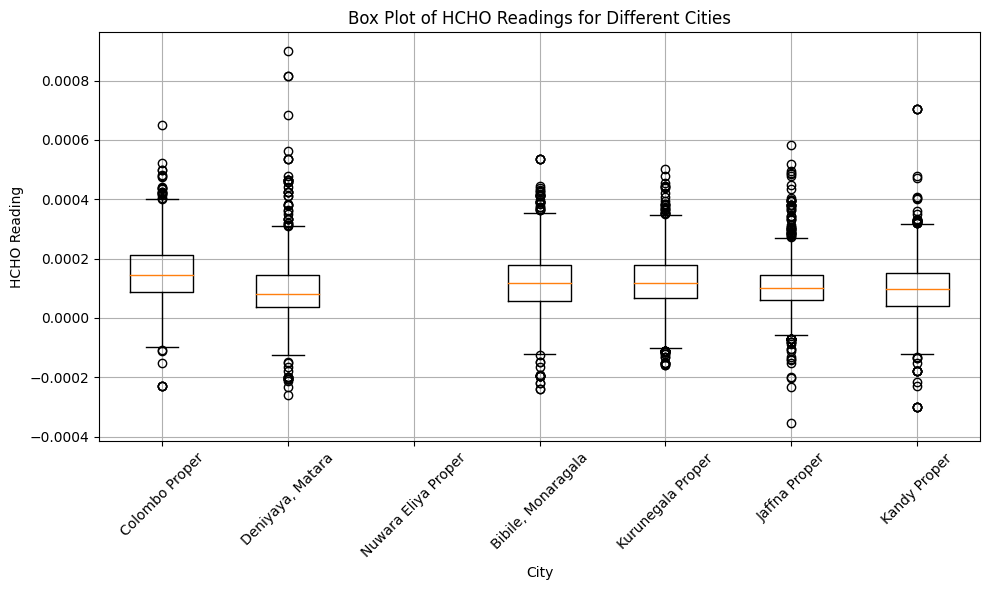

In [17]:
import matplotlib.pyplot as plt

# Convert each DataFrame to Pandas DataFrame for plotting
colombo_pd = colombo_df.select("HCHO reading").toPandas()
deniyaya_matara_pd = deniyaya_matara_df.select("HCHO reading").toPandas()
nuwara_eliya_pd = nuwara_eliya_df.select("HCHO reading").toPandas()
bibile_monaragala_pd = bibile_monaragala_df.select("HCHO reading").toPandas()
kurunegala_pd = kurunegala_df.select("HCHO reading").toPandas()
jaffna_pd = jaffna_df.select("HCHO reading").toPandas()
kandy_pd = kandy_df.select("HCHO reading").toPandas()

# Plot box plots for each city
plt.figure(figsize=(10, 6))
plt.boxplot([colombo_pd["HCHO reading"], deniyaya_matara_pd["HCHO reading"], nuwara_eliya_pd["HCHO reading"],
             bibile_monaragala_pd["HCHO reading"], kurunegala_pd["HCHO reading"], jaffna_pd["HCHO reading"],
             kandy_pd["HCHO reading"]],
            labels=["Colombo Proper", "Deniyaya, Matara", "Nuwara Eliya Proper", "Bibile, Monaragala",
                    "Kurunegala Proper", "Jaffna Proper", "Kandy Proper"])
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.title("Box Plot of HCHO Readings for Different Cities")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql.functions import stddev, mean, col, abs as abs_spark

# Define a function to remove outliers
def remove_outliers(df, column_name, threshold=3):
    # Calculate mean and standard deviation
    mean_value = df.select(mean(col(column_name))).first()[0]
    stddev_value = df.select(stddev(col(column_name))).first()[0]

    # Calculate Z-score
    df_with_zscore = df.withColumn("z_score", (col(column_name) - mean_value) / stddev_value)

    # Filter out outliers based on threshold
    filtered_df = df_with_zscore.filter(abs_spark(col("z_score")) <= threshold)

    # Drop the z_score column
    filtered_df = filtered_df.drop("z_score")

    return filtered_df

# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Remove outliers for each city DataFrame
city_dfs_without_outliers = []

for city_df in city_dfs:
    city_df_without_outliers = remove_outliers(city_df, "HCHO reading")
    city_dfs_without_outliers.append(city_df_without_outliers)

In [25]:
from pyspark.sql.functions import col, when, abs as abs_spark, last
from pyspark.sql.window import Window

def replace_outliers_with_previous_value(df, column_name, threshold=3):
    """
    Replaces outliers in a PySpark DataFrame column with the previous non-null value.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing the column with potential outliers.
        column_name (str): The name of the column with potential outliers.
        threshold (float): The threshold value to detect outliers.

    Returns:
        pyspark.sql.DataFrame: The DataFrame with outliers replaced by the previous non-null value.
    """

    # Calculate the Z-score for outlier detection
    mean_value = df.selectExpr(f"avg(`{column_name}`)").collect()[0][0]
    stddev_value = df.selectExpr(f"stddev_samp(`{column_name}`)").collect()[0][0]
    df = df.withColumn("z_score", (col(column_name) - mean_value) / stddev_value)

    # Create a window specification for forward fill
    ffill = Window.partitionBy('Location').orderBy('Current Date').rowsBetween(Window.unboundedPreceding, Window.currentRow)

    # Fill missing values with the previous non-null value
    df = df.withColumn(column_name + '_filled', last(column_name, ignorenulls=True).over(ffill))

    # Replace outliers with the previous non-null value
    df = df.withColumn(column_name + '_replaced', when(abs_spark(col("z_score")) > threshold, col(column_name + '_filled')).otherwise(col(column_name)))

    return df.drop("z_score", column_name).withColumnRenamed(column_name + '_replaced', column_name)


In [26]:
# List of DataFrames for all cities
city_dfs = [colombo_df, deniyaya_matara_df, nuwara_eliya_df, bibile_monaragala_df, kurunegala_df, jaffna_df, kandy_df]

# Replace outliers for each city DataFrame
city_dfs_replaced_outliers = []

for city_df in city_dfs:
    city_df_with_replaced_outliers = replace_outliers_with_previous_value(city_df, "HCHO reading")
    city_dfs_replaced_outliers.append(city_df_with_replaced_outliers)


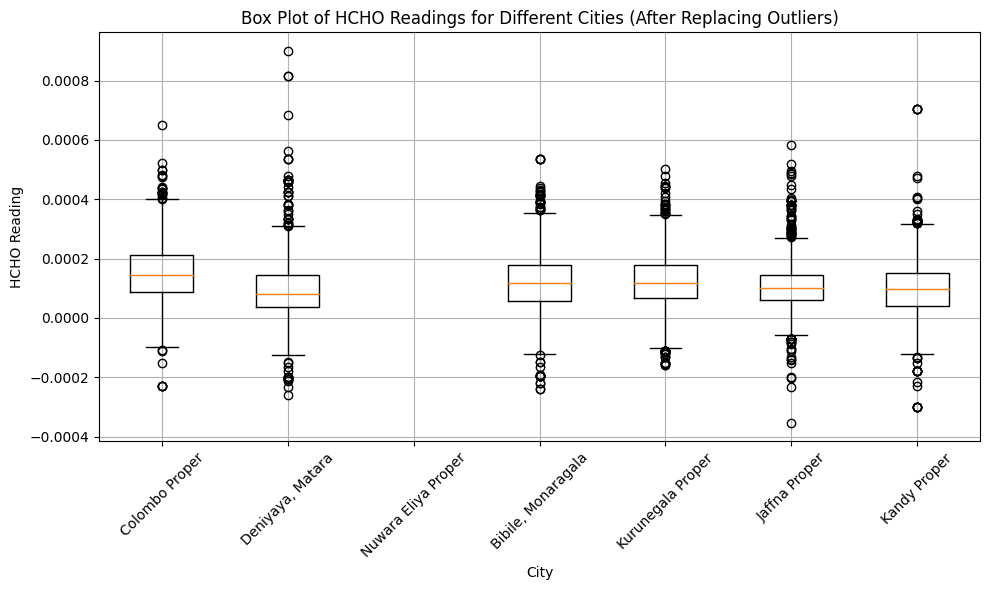

In [27]:
import matplotlib.pyplot as plt

# Convert each DataFrame to Pandas DataFrame for plotting
city_dfs_replaced_outliers_pd = [city_df.select("HCHO reading").toPandas() for city_df in city_dfs_replaced_outliers]

# Plot box plots for each city
plt.figure(figsize=(10, 6))
plt.boxplot([city_df["HCHO reading"] for city_df in city_dfs_replaced_outliers_pd],
            labels=[city_df.select("Location").first()[0] for city_df in city_dfs])
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.title("Box Plot of HCHO Readings for Different Cities (After Replacing Outliers)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
